# Area to Faces
Interpolation of source values to the faces formed by the union of the source and target polygons

In [1]:
from shapely.geometry import Polygon
import numpy as np
%matplotlib inline

In [2]:
import geopandas as gpd


In [3]:
from tobler.area_weighted  import area_faces
from tobler.area_weighted import area_buffer

## Example: Two GeoDataFrames

In [4]:
polys1 = gpd.GeoSeries([Polygon([(0,0), (10,0), (10,5), (0,5)]),
                      Polygon([(0,5), (0,10),  (5,10), (5,5)]),
                      Polygon([(5,5), (5,10), (7,10), (7,5)]),
                    Polygon([(7,5), (7,10), (10,10), (10,5)]) ]
                      )


buffer = gpd.GeoSeries([Polygon([ (0,0), (0, 10), (6, 10), (6,0)])])


df1 = gpd.GeoDataFrame({'geometry': polys1})
df2 = gpd.GeoDataFrame({'geometry': buffer})
df1['population'] = [ 500,  200, 100, 50]
df1['pci'] = [75, 100, 40, 30]
df1['income'] = df1['population'] * df1['pci']
df2['population'] = 10000
df2['pci'] = 80



There are four polygons in the first dataframe and one in the second.

<Axes: >

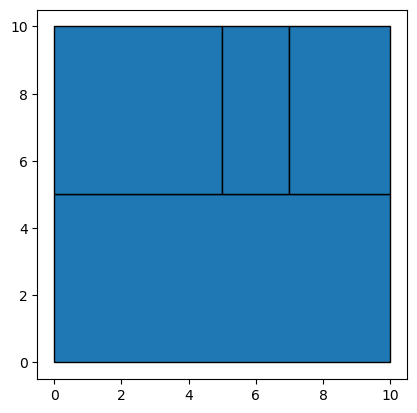

In [5]:
df1.plot(edgecolor='k')

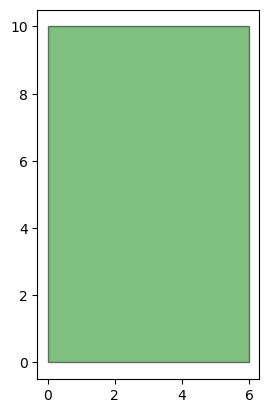

In [6]:
ax = df2.plot(color='green', alpha=0.5, edgecolor='k')

The overlay will create 6 polygons

<Axes: >

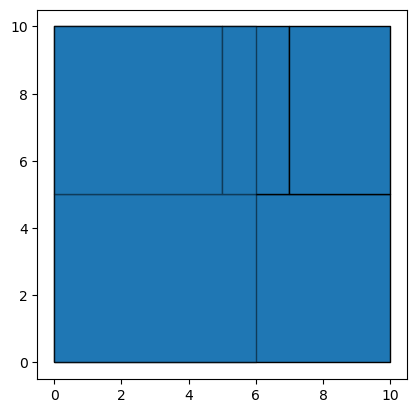

In [7]:
base = df1.plot(edgecolor='k')
df2.plot(ax=base, edgecolor='k', alpha=.50)

We can interpolate from the first geodataframe into these 6 new polygons

In [8]:
f_gdf = area_faces(df1, df2, extensive_variables=['population'])

In [9]:
f_gdf

,population,geometry
0,299.999982,"POLYGON ((0.00000 0.00000, 0.00000 5.00000, 6...."
1,200.000000,"POLYGON ((0.00000 10.00000, 5.00000 10.00000, ..."
2,50.000000,"POLYGON ((5.00000 10.00000, 6.00000 10.00000, ..."
3,199.999988,"POLYGON ((10.00000 5.00000, 10.00000 0.00000, ..."
4,50.000000,"POLYGON ((7.00000 10.00000, 7.00000 5.00000, 6..."
5,50.000000,"POLYGON ((7.00000 5.00000, 7.00000 10.00000, 1..."


In [10]:
f_gdf.population.sum(), df1.population.sum()

(849.9999701976776, 850)

In [11]:
f_gdf.population.values

array([299.99998212, 200.        ,  50.        , 199.99998808,
        50.        ,  50.        ])

In [12]:
f_gdf.shape

(6, 2)

<Axes: >

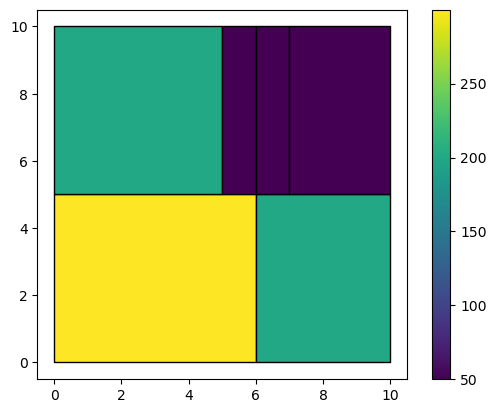

In [13]:
f_gdf.plot(column='population', edgecolor='k', legend=True)

In [14]:
f_gdf = area_faces(df1, df2, extensive_variables=['population'],
                  intensive_variables=['pci'])
f_gdf

,population,pci,geometry
0,299.999982,75.0,"POLYGON ((0.00000 0.00000, 0.00000 5.00000, 6...."
1,200.000000,100.0,"POLYGON ((0.00000 10.00000, 5.00000 10.00000, ..."
2,50.000000,40.0,"POLYGON ((5.00000 10.00000, 6.00000 10.00000, ..."
3,199.999988,75.0,"POLYGON ((10.00000 5.00000, 10.00000 0.00000, ..."
4,50.000000,40.0,"POLYGON ((7.00000 10.00000, 7.00000 5.00000, 6..."
5,50.000000,30.0,"POLYGON ((7.00000 5.00000, 7.00000 10.00000, 1..."


<Axes: >

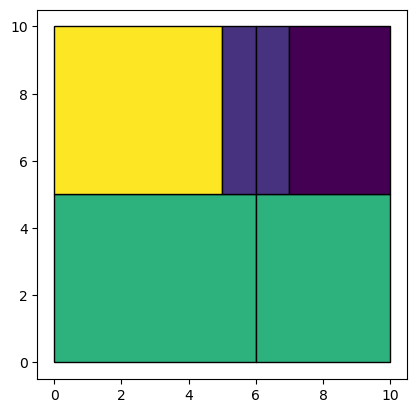

In [15]:
f_gdf.plot(edgecolor='k', column='pci')

And, we can interpolate from the second dataframe into the same six polygons

In [16]:
f_gdf = area_faces(df2, df1, extensive_variables=['population'],
                  intensive_variables=['pci'])
f_gdf

,population,pci,geometry
0,5000.000000,80.0,"POLYGON ((0.00000 5.00000, 6.00000 5.00000, 6...."
1,4166.666865,80.0,"POLYGON ((0.00000 10.00000, 5.00000 10.00000, ..."
2,833.333358,80.0,"POLYGON ((6.00000 10.00000, 6.00000 5.00000, 5..."
3,0.000000,0.0,"POLYGON ((10.00000 5.00000, 10.00000 0.00000, ..."
4,0.000000,0.0,"POLYGON ((7.00000 10.00000, 7.00000 5.00000, 6..."
5,0.000000,0.0,"POLYGON ((7.00000 5.00000, 7.00000 10.00000, 1..."


<Axes: >

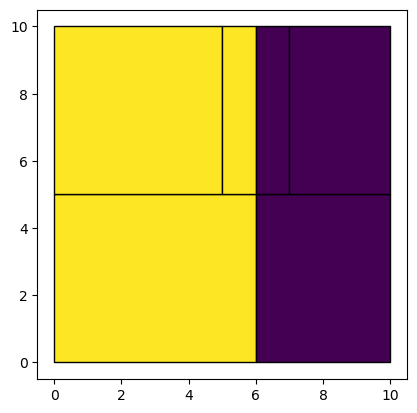

In [17]:
f_gdf.plot(edgecolor='k', column='pci')

# area_buffer

Classify the spatial relationship between source geometries (polygons) and a second set of polygons

In [18]:
area_buffer(df1, df2)

,geometry,population,pci,income,right_relation
0,"POLYGON ((0.00000 0.00000, 10.00000 0.00000, 1...",500,75,37500,partial
1,"POLYGON ((0.00000 5.00000, 0.00000 10.00000, 5...",200,100,20000,within
2,"POLYGON ((5.00000 5.00000, 5.00000 10.00000, 7...",100,40,4000,partial
3,"POLYGON ((7.00000 5.00000, 7.00000 10.00000, 1...",50,30,1500,disjoint


This is useful in spatial disparities research where census tracts may be classified as within, partially within/out, or disjoint with buffers.